# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 573


---

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
weather_api_key = "f6c8d0307b03b45f6aa9fee769022df0"
appid = weather_api_key
settings = {"units": "imperial", "appid": weather_api_key}
url = f"{url}appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp_max = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | fort mcmurray
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | nueva palestina
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | nadi
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | eirunepe
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | igarka
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | la passe
Processing Record 18 of Set 1 | vilyuchinsk
Processing Record 19 of Set 1 | wingham
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | mahibadhoo
Processing Record 22 of Set 1 | iskateley
Processi

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,275.26,96,100,3.36,RU,1717968397
1,blackmans bay,-43.0167,147.3167,277.89,86,7,0.89,AU,1717968397
2,port-aux-francais,-49.3500,70.2167,278.18,95,100,15.31,TF,1717968397
3,talnakh,69.4865,88.3972,276.60,98,100,1.72,RU,1717968397
4,dudinka,69.4058,86.1778,276.86,94,100,3.58,RU,1717968397


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,275.26,96,100,3.36,RU,1717968397
1,blackmans bay,-43.0167,147.3167,277.89,86,7,0.89,AU,1717968397
2,port-aux-francais,-49.3500,70.2167,278.18,95,100,15.31,TF,1717968397
3,talnakh,69.4865,88.3972,276.60,98,100,1.72,RU,1717968397
4,dudinka,69.4058,86.1778,276.86,94,100,3.58,RU,1717968397


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

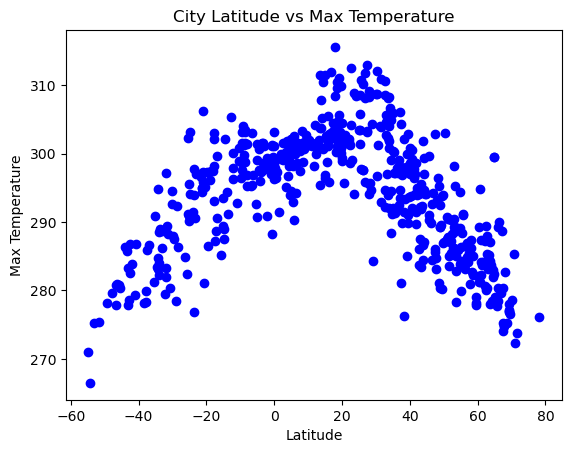

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker= "o", color = "blue")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

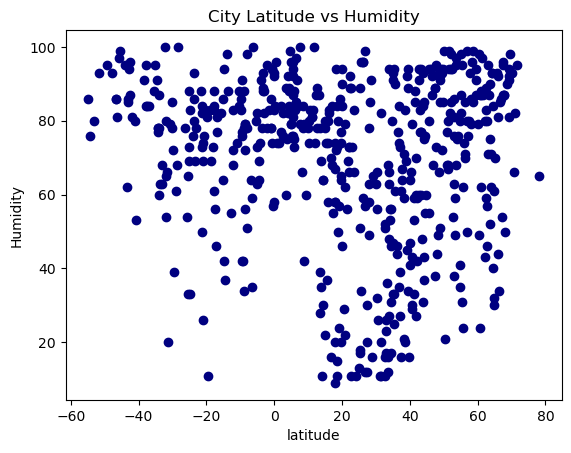

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", color= "navy")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Humidity")
plt.xlabel("latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

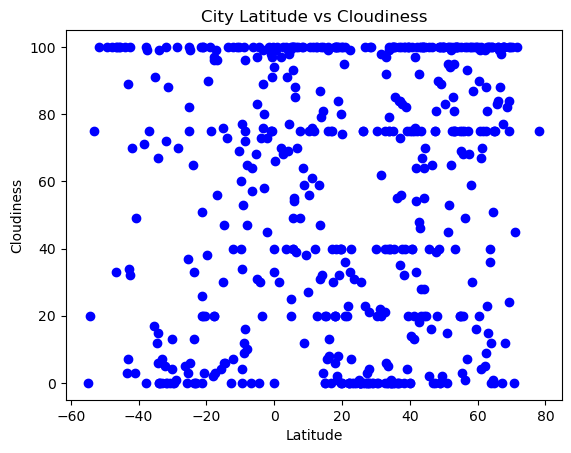

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", color= "blue")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

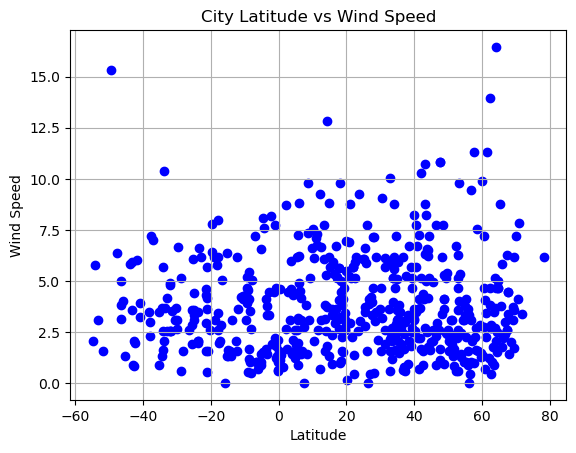

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", color= "blue")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regress(x, y, eqn_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    print(f"The r-value is: {rvalue}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,275.26,96,100,3.36,RU,1717968397
3,talnakh,69.4865,88.3972,276.60,98,100,1.72,RU,1717968397
4,dudinka,69.4058,86.1778,276.86,94,100,3.58,RU,1717968397
5,fort mcmurray,56.7268,-111.3810,286.92,50,100,3.09,CA,1717968397
6,petropavlovsk-kamchatsky,53.0452,158.6483,288.48,63,75,6.26,RU,1717968397


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,277.89,86,7,0.89,AU,1717968397
2,port-aux-francais,-49.3500,70.2167,278.18,95,100,15.31,TF,1717968397
9,nadi,-17.8000,177.4167,298.15,61,20,2.57,FJ,1717968398
11,eirunepe,-6.6603,-69.8736,303.04,59,57,1.02,BR,1717968398
12,ushuaia,-54.8000,-68.3000,270.96,86,0,2.06,AR,1717968398


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7558015448286126


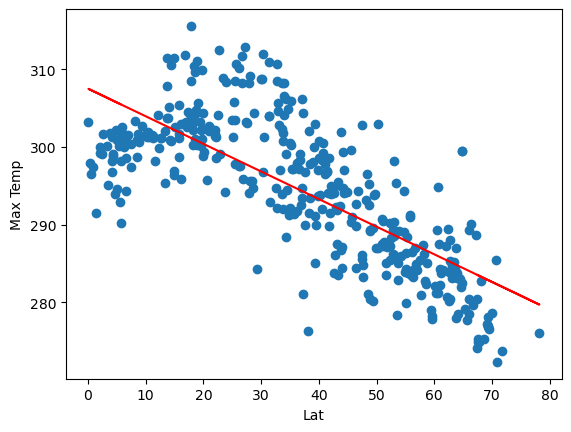

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_regress(x, y, (10,-30))

The r-value is: 0.7981181668818477


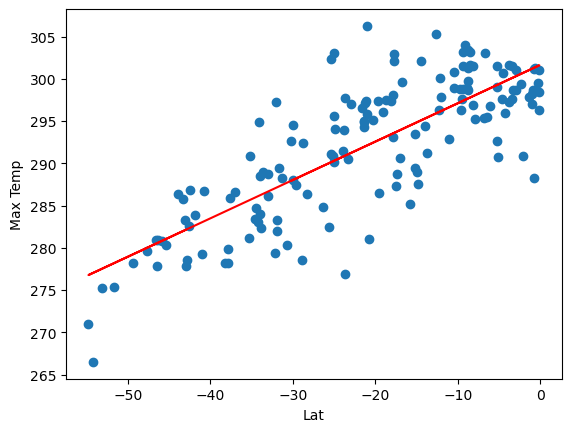

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_regress(x, y, (-40,10))

**Discussion about the linear relationship:** There is a strong negative correlation between Latitude and Max temp in the Northern Hemisphere vs a positive correlation between latitude and Max temp in the southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08570820666161975


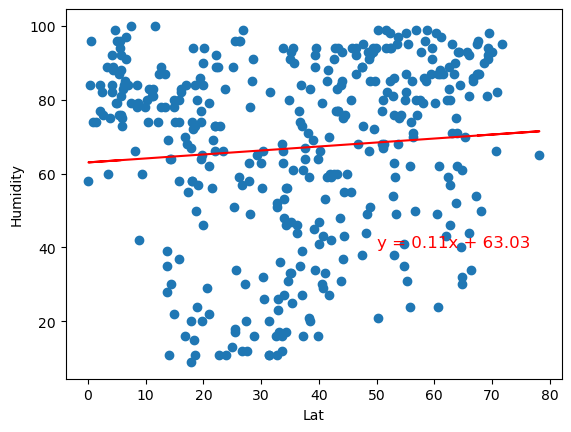

In [18]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_regress(x, y, (50, 40))

The r-value is: -0.10606339930790094


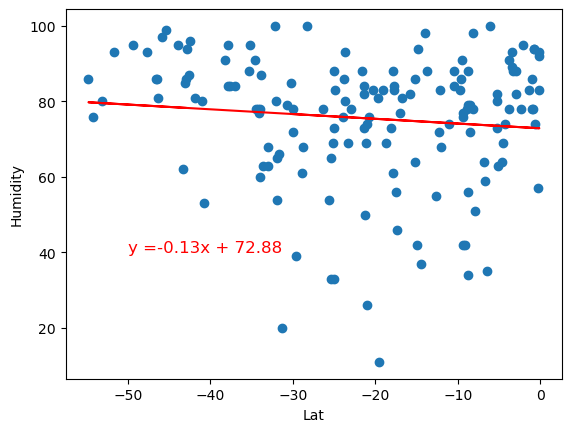

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_regress(x, y, (-50, 40))

**Discussion about the linear relationship:** Both Hemispheres show a very slight correlation between Latitude and Humidity; specifically, positive in the North vs negative in the South.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10541361280398082


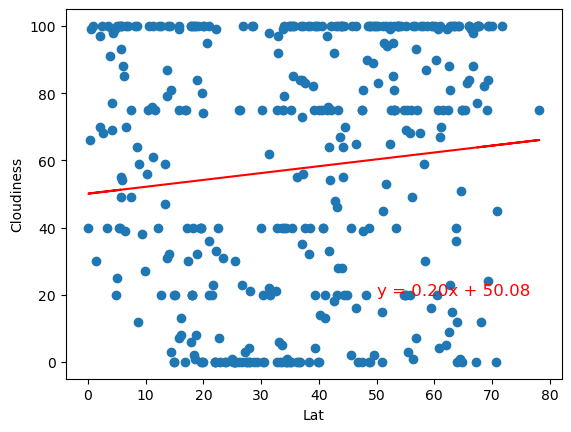

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_regress(x, y, (50, 20))

The r-value is: 0.09638567718849822


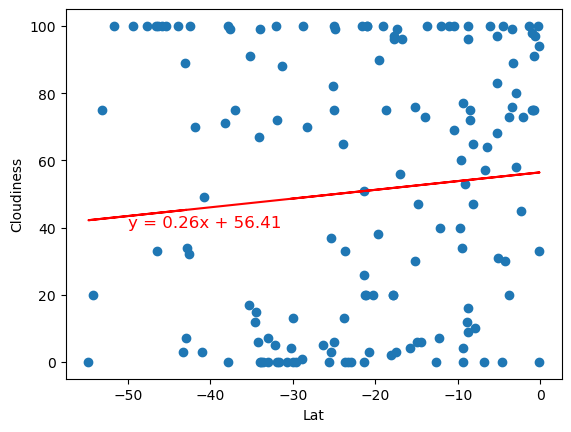

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_regress(x, y, (-50, 40))

**Discussion about the linear relationship:** Both Hemispheres show a positive correlation between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03636828395731754


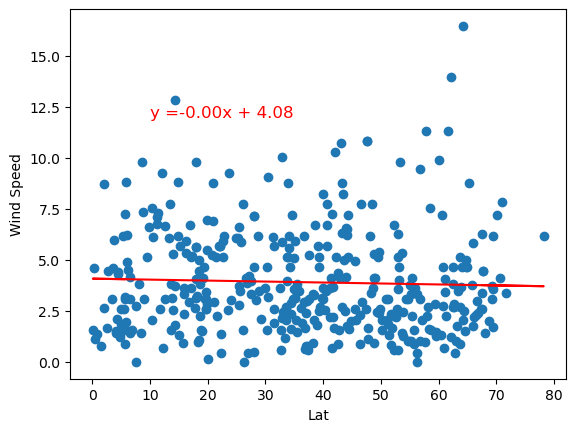

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_regress(x, y, (10, 12))

The r-value is: -0.14449074991973693


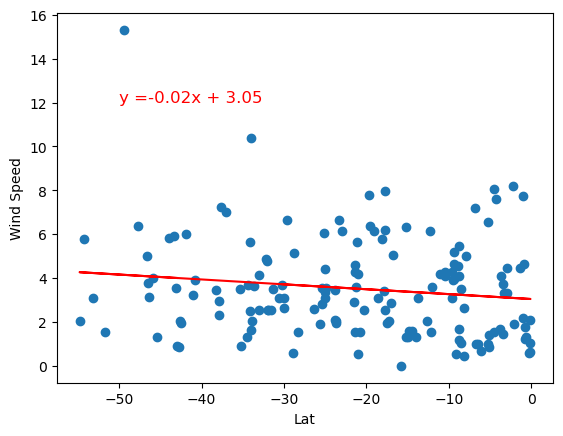

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_regress(x, y, (-50, 12))

**Discussion about the linear relationship:** The Northern Hemisphere shows no correaltion between Latitude and Windspeed, while the Southern Hemisphere shows a slight negative correlation between Latitude and Windspeed.